# **Vehicle Insurance Prediction Dataset**

## **EDA**

In [59]:
# importing libraries
import pandas as pd 
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams['figure.figsize'] = [6, 3]

In [37]:
# reading dataset
df = pd.read_csv('data.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [38]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [39]:
# shape of dataset
df.shape

(381109, 12)

In [40]:
# checking for null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [41]:
# checking for duplicated values
duplicate_values = df.duplicated().sum()
duplicate_values

np.int64(0)

In [42]:
# statistical discription of dataset
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### **Univariate analysis**

In [43]:
# Gender column

# counting values for male and female
gender_value_counts = df['Gender'].value_counts()
gender_value_counts

Gender
Male      206089
Female    175020
Name: count, dtype: int64

Gender
Male      54.08
Female    45.92
Name: count, dtype: float64


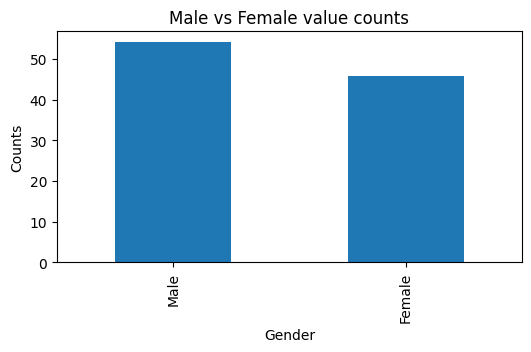

In [108]:
# plot for gender value counts
values_in_percent = ((gender_value_counts/df.shape[0])*100)
print(round(values_in_percent, 2))
values_in_percent.plot(kind='bar')
plt.title('Male vs Female value counts')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.show()

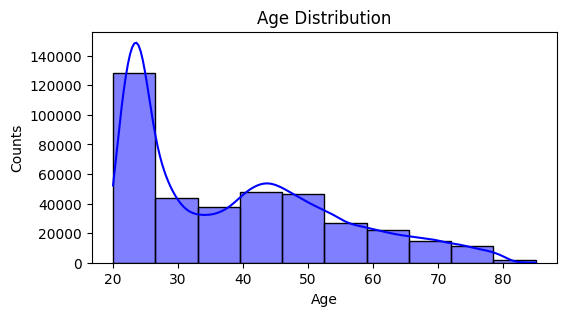

In [107]:
# age 

# age distributions
sns.histplot(df['Age'], kde=True, bins=10, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

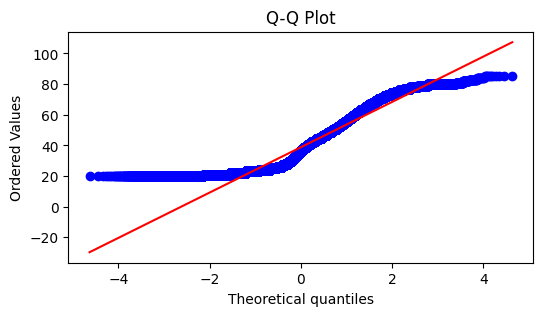

In [60]:
# Create Q-Q plot
stats.probplot(df['Age'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

From above Q-Q plot it shows that data is gaussian in the middle and not that much gaussian at both ends 

In [34]:
# average, minimum and maximum age
avg_age = round(sum(df['Age'])/len(df['Age']))
print('Mean age is: ',avg_age)
print('Maximum age is: ', max(df['Age']))
print('Minimum age is: ', min(df['Age']))

Mean age is:  39
Maximum age is:  85
Minimum age is:  20


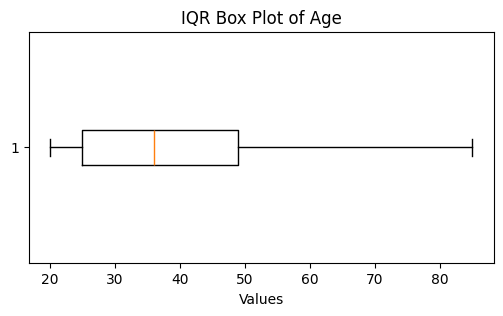

In [53]:
# Boxplot for age
plt.boxplot(df['Age'], vert=False)
plt.title("IQR Box Plot of Age")
plt.xlabel("Values")
plt.show()

Driving_License
1    99.786938
0     0.213062
Name: count, dtype: float64


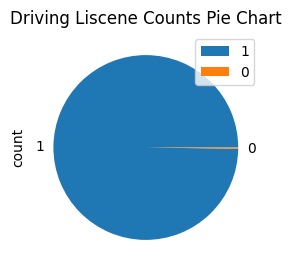

In [65]:
# driving liscene

driving_liscene_counts = df['Driving_License'].value_counts()
print((driving_liscene_counts/df.shape[0])*100)
driving_liscene_counts.plot(kind='pie')
plt.title('Driving Liscene Counts Pie Chart')
plt.legend()
plt.show()

99.7% people has driving liscene. So there is no need of this column

In [ ]:
# Region_Code

region_counts = df['Region_Code'].nunique()
print(f'There are {region_counts} unique regions')


There are 53 unique regions


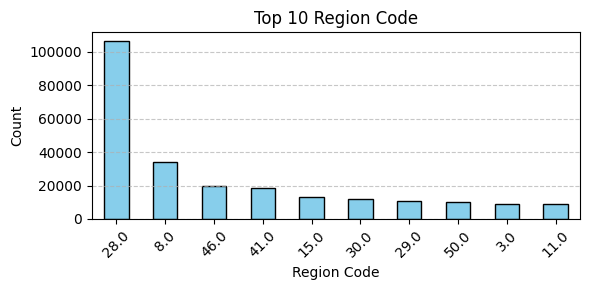

In [154]:
# Region_Code
region_counts = df['Region_Code'].value_counts().head(10)

# Plot a bar graph
region_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Region Code')
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Previously_Insured
0    54.0
1    46.0
Name: count, dtype: float64 2


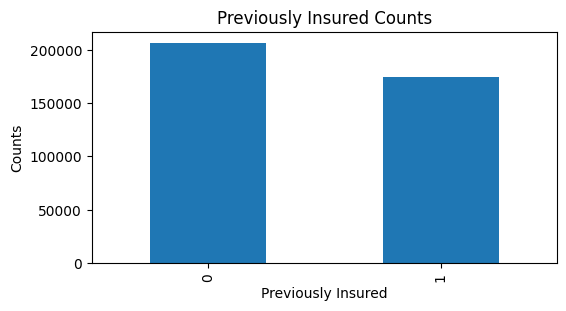

In [106]:
# Previously_Insured

previously_insured_counts = df['Previously_Insured'].value_counts()
print(round(previously_insured_counts/df.shape[0]*100),2)
previously_insured_counts.plot(kind='bar')
plt.title('Previously Insured Counts')
plt.xlabel('Previously Insured')
plt.ylabel('Counts')
plt.show()

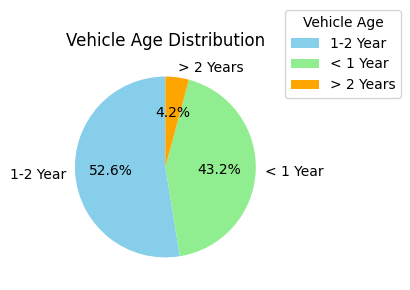

In [111]:
# Vehicle_Age

# Vehicle Age Pie Chart
df['Vehicle_Age'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',  # Format percentages to 1 decimal place
    startangle=90,      # Rotate pie chart for better aesthetics
    colors=['skyblue', 'lightgreen', 'orange']  # Optional: Custom colors
)
plt.title('Vehicle Age Distribution')
plt.ylabel('')  # Remove default ylabel

# Add legend beside the pie chart
plt.legend(
    title='Vehicle Age',
    loc='center left',
    bbox_to_anchor=(1, 1)  # Position the legend to the right
)

plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

Vehicle_Damage
Yes    50.0
No     50.0
Name: count, dtype: float64 2


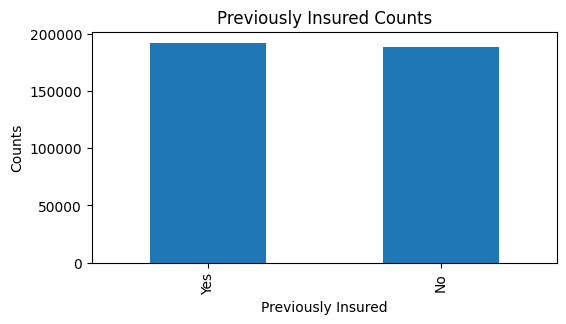

In [112]:
# Vehicle_damage

vehicle_damage_counts = df['Vehicle_Damage'].value_counts()
print(round(vehicle_damage_counts/df.shape[0]*100),2)
vehicle_damage_counts.plot(kind='bar')
plt.title('Previously Insured Counts')
plt.xlabel('Previously Insured')
plt.ylabel('Counts')
plt.show()

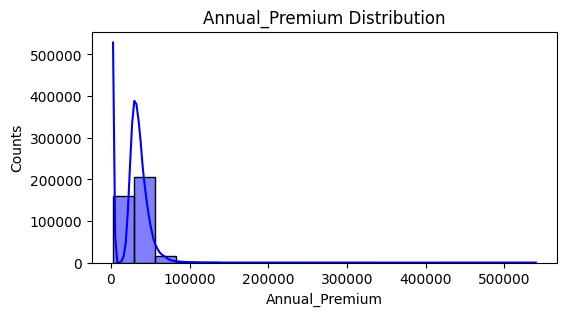

In [114]:
# Annual_Premium

# Annual_Premium distributions
sns.histplot(df['Annual_Premium'], kde=True, bins=20, color='blue')
plt.title('Annual_Premium Distribution')
plt.xlabel('Annual_Premium')
plt.ylabel('Counts')
plt.show()

In [117]:
# average, minimum and maximum Annual_Premium
avg_annual_premium = round(sum(df['Annual_Premium'])/len(df['Annual_Premium']), 2)
print('Mean anual premium is: ',avg_annual_premium)
print('Maximum anual premium is: ', max(df['Annual_Premium']))
print('Minimum anual premium is: ', min(df['Annual_Premium']))

Mean anual premium is:  30564.39
Maximum anual premium is:  540165.0
Minimum anual premium is:  2630.0


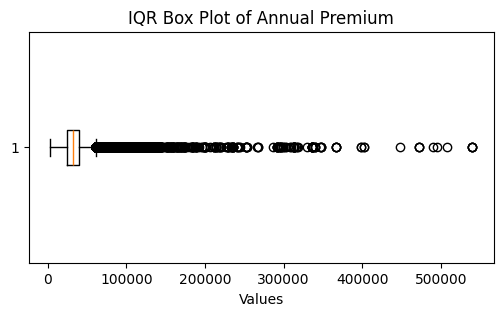

In [118]:
# Boxplot for annual premium
plt.boxplot(df['Annual_Premium'], vert=False)
plt.title("IQR Box Plot of Annual Premium")
plt.xlabel("Values")
plt.show()

There are lots of outliers in Annual Premium. So we will have to do something to remove outliers like upper capping.

In [125]:
# Policy_Sales_Channel

print(f"There are {df['Policy_Sales_Channel'].nunique()} unique values in Policy Sales Channel")

There are 155 unique values in Policy Sales Channel


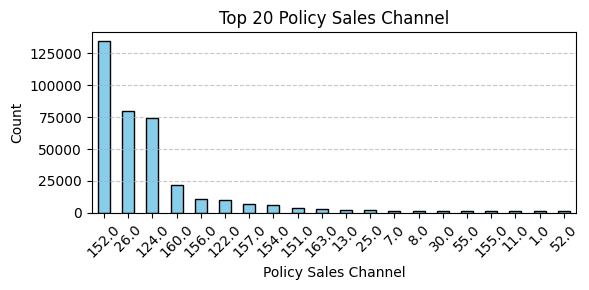

In [156]:
# top 10 policy sales channel

policy_channel_counts = df['Policy_Sales_Channel'].value_counts().head(20)

#plot of top 10 policy sales channel
policy_channel_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 20 Policy Sales Channel')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

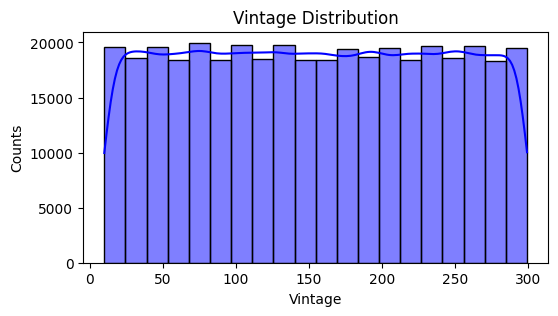

In [157]:
# Vintage

# Vintage distributions
sns.histplot(df['Vintage'], kde=True, bins=20, color='blue')
plt.title('Vintage Distribution')
plt.xlabel('Vintage')
plt.ylabel('Counts')
plt.show()

In [160]:
# average, minimum and maximum Annual_Premium
avg_annual_premium = round(sum(df['Vintage'])/len(df['Vintage']), 2)
print('Mean anual vintage is: ',avg_annual_premium)
print('Maximum vintage is: ', max(df['Vintage']))
print('Minimum vintage is: ', min(df['Vintage']))

Mean anual vintage is:  154.35
Maximum vintage is:  299
Minimum vintage is:  10


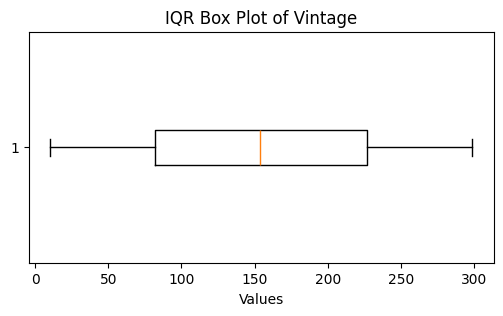

In [161]:
# Boxplot for age
plt.boxplot(df['Vintage'], vert=False)
plt.title("IQR Box Plot of Vintage")
plt.xlabel("Values")
plt.show()

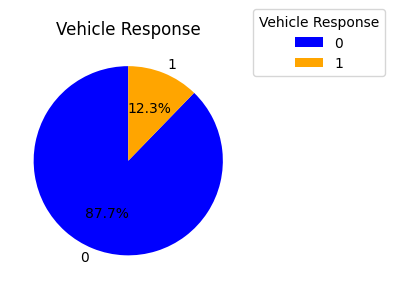

In [165]:
# Response

# Vehicle Age Pie Chart
df['Response'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',  # Format percentages to 1 decimal place
    startangle=90,      # Rotate pie chart for better aesthetics
    colors=['blue', 'orange']  # Optional: Custom colors
)
plt.title('Vehicle Response')
plt.ylabel('')  # Remove default ylabel

# Add legend beside the pie chart
plt.legend(
    title='Vehicle Response',
    loc='center left',
    bbox_to_anchor=(1, 1)  # Position the legend to the right
)

plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

Data is imbalanced. We will have to perform some balancing technique

### **Bivariate Analysis**